<a href="https://colab.research.google.com/github/ameenattar92/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [127]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, log_loss, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

%matplotlib inline

In [128]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
path = '/content/drive/MyDrive/Capstone_project3/data_cardiovascular_risk.csv'

In [130]:
cvs_df = pd.read_csv(path , index_col = "id")

#1. Explorartory Data Analysis

In [131]:
#Checking the first five observations
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [132]:
#Checking the bottom five observations
cvs_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [133]:
#Checking the shape of our dataset
cvs_df.shape

(3390, 16)

In [134]:
#Looking at the info of our dataset
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [135]:
#Looking up for the detailed description of our dataset.
cvs_df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [136]:
#Renaming the column names
cvs_df.rename(columns = {'totChol' : 'Total_Cholestrol'}, inplace=True)
cvs_df.rename(columns = {'sysBP' : 'Systolic_BP'}, inplace=True)
cvs_df.rename(columns = {'diaBP' : 'Diastolic_BP'}, inplace=True)

In [137]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#Exploring the dependent variable

In [138]:
#Checking the Null values
cvs_df['TenYearCHD'].isnull().sum()

0

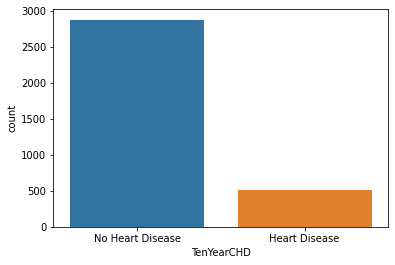

In [139]:
# visualizing the target variable
g = sns.countplot(cvs_df['TenYearCHD'])
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

In [140]:
# Class count
class_count_0, class_count_1 = cvs_df['TenYearCHD'].value_counts()

# Separate class
class_0 = cvs_df[cvs_df['TenYearCHD'] == 0]
class_1 = cvs_df[cvs_df['TenYearCHD'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2879, 16)
class 1: (511, 16)




Now let's go ahead and check for the missing values in rest of the dataset

In [141]:
#Checking the missing values for whole dataset
missing_values = cvs_df.isnull()

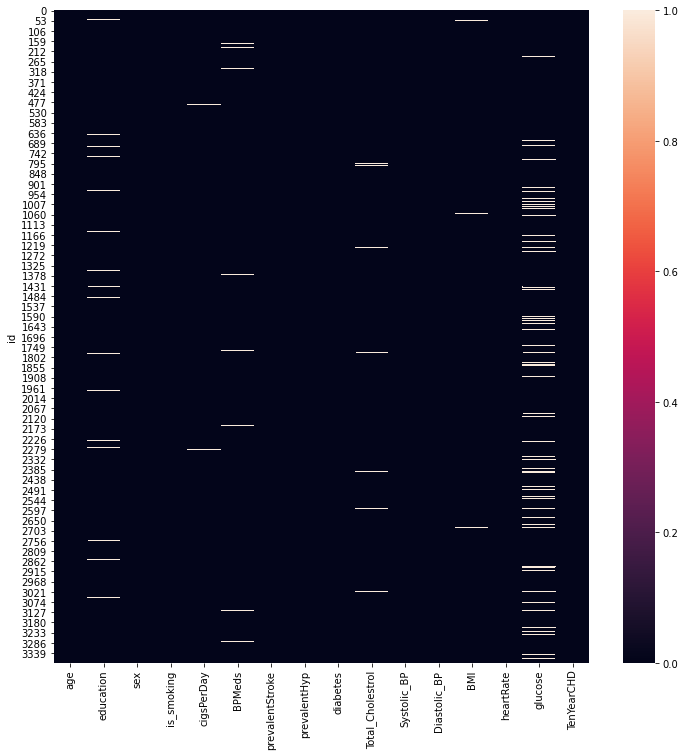

In [142]:
#Plotting the heatmap for missing values 

plt.figure(figsize=(12,12))
sns.heatmap(missing_values)

In [143]:
# Summing up the missing values 
cvs_df.isnull().sum()


age                   0
education            87
sex                   0
is_smoking            0
cigsPerDay           22
BPMeds               44
prevalentStroke       0
prevalentHyp          0
diabetes              0
Total_Cholestrol     38
Systolic_BP           0
Diastolic_BP          0
BMI                  14
heartRate             1
glucose             304
TenYearCHD            0
dtype: int64

As we can see above the Glucose feature has the highest number of missing values followed by education, BPmeds, TotalCholestrol, CigsPerday, BMI & heartRate.

In [144]:
# Filling up the numerical NaN values using mode

cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace=True)
cvs_df['cigsPerDay'].fillna(cvs_df['cigsPerDay'].mode()[0], inplace=True)
cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0], inplace=True)
cvs_df['Total_Cholestrol'].fillna(cvs_df['Total_Cholestrol'].mode()[0], inplace=True)
cvs_df['glucose'].fillna(cvs_df['glucose'].mode()[0], inplace=True)
cvs_df['BMI'].fillna(cvs_df['BMI'].mode()[0], inplace=True)
cvs_df['heartRate'].fillna(cvs_df['heartRate'].mode()[0], inplace=True)

In [145]:
filled_NaN = cvs_df.isnull()

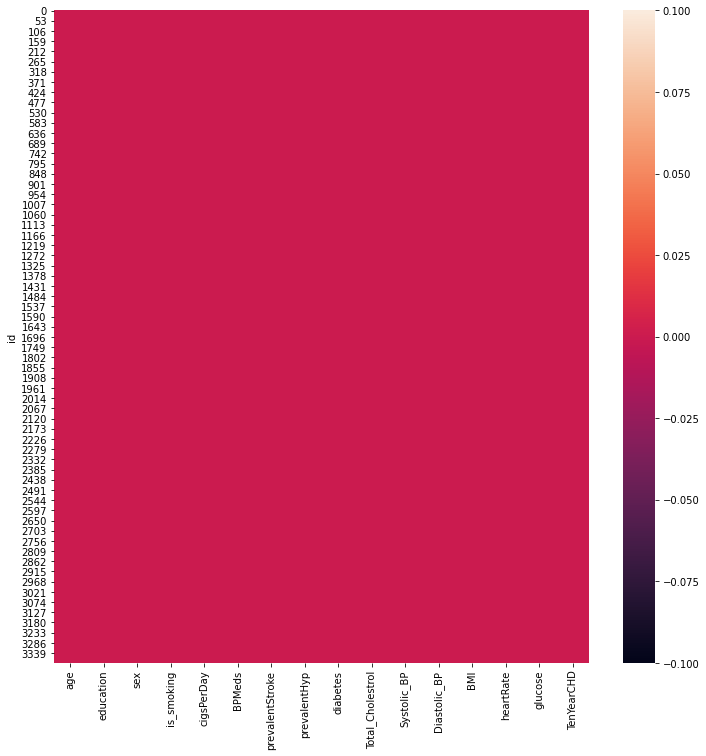

In [146]:
#Plotting the heatmap after treating the missing values
plt.figure(figsize=(12,12))
sns.heatmap(filled_NaN)

In [147]:
cvs_df.isnull().sum()

age                 0
education           0
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
Total_Cholestrol    0
Systolic_BP         0
Diastolic_BP        0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

As seen above all the missing values has been treated.

Now let's check the correlation between each feature.

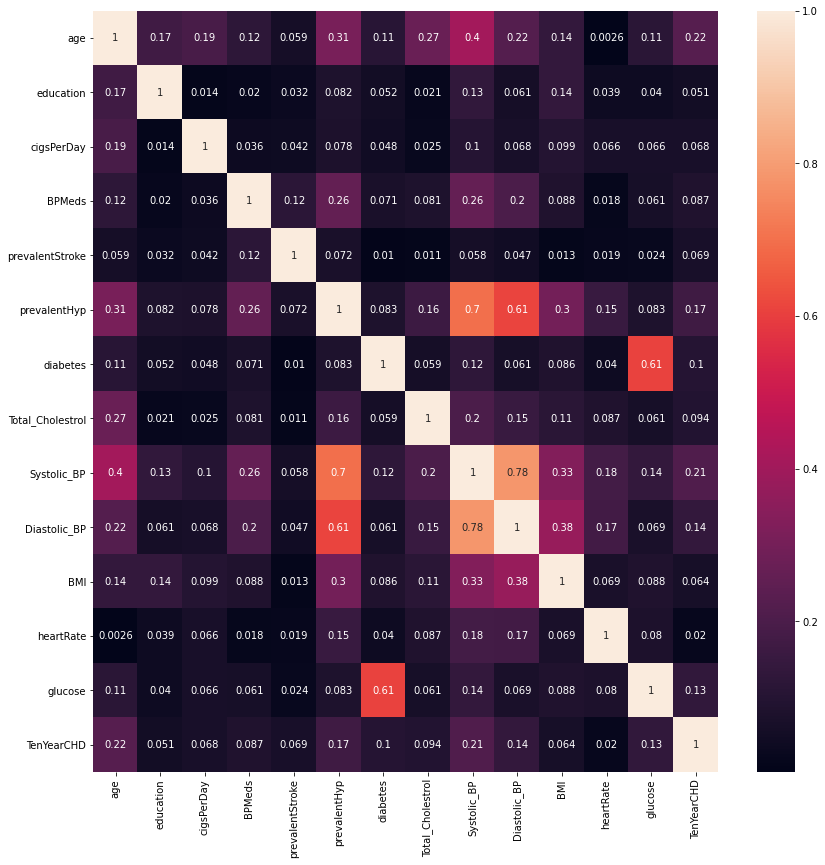

In [148]:
#Plotting the correlation matrix using heatmap
plt.figure(figsize=(14,14))
correlation = cvs_df.corr()
sns.heatmap(abs(correlation), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18950f7350>,
      dtype=object)

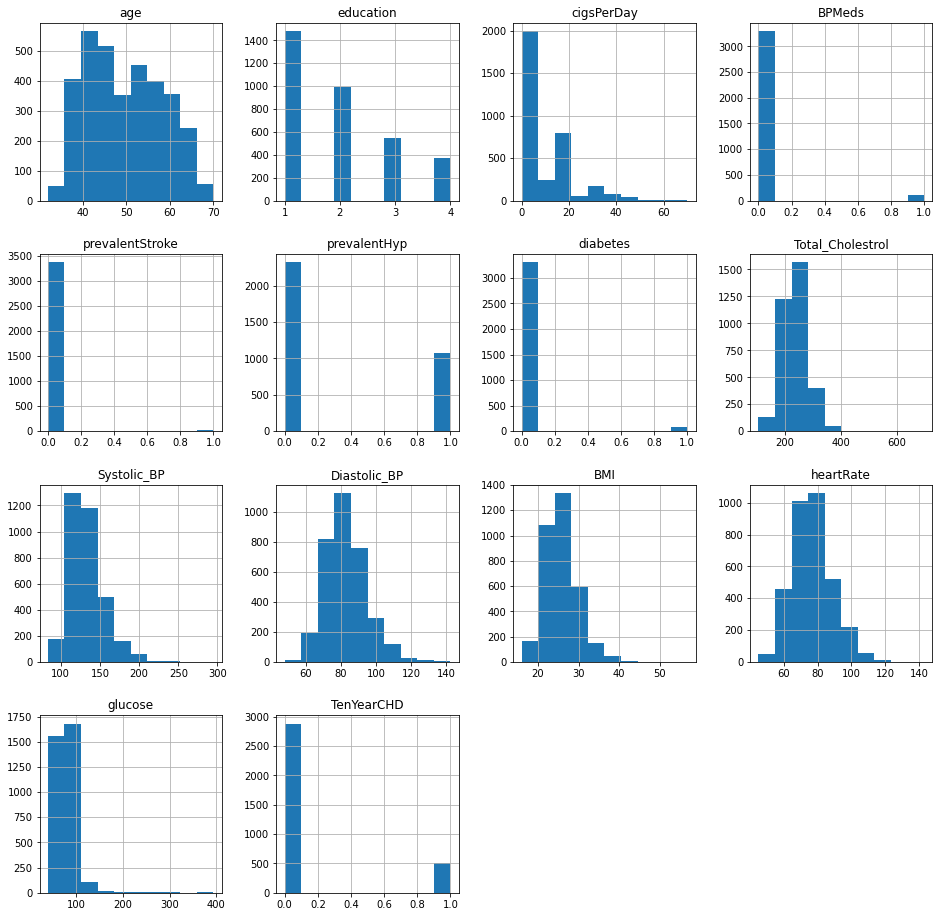

In [149]:
cvs_df.hist(figsize=(16,16))

#Analysing the categorical features

**Which Sex is prone to coronary heart disease?**

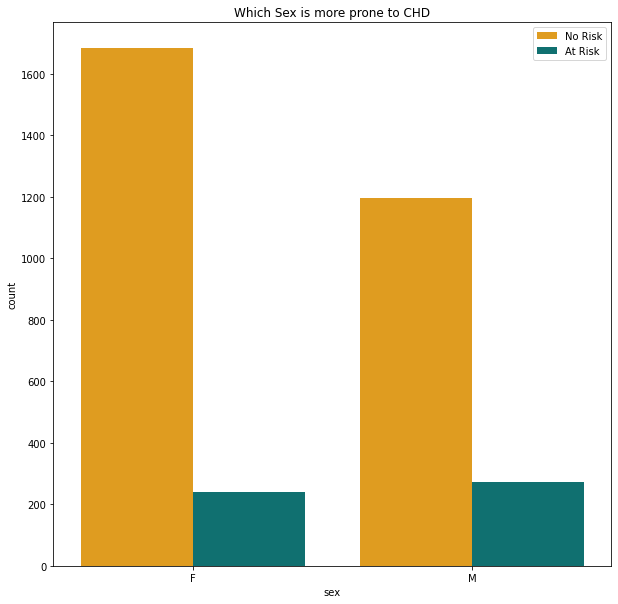

In [150]:
my_palette = {0 : 'orange' , 1 : 'teal'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['sex'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Sex is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is diabetes patients are at more risk of coronary heart disease ??**

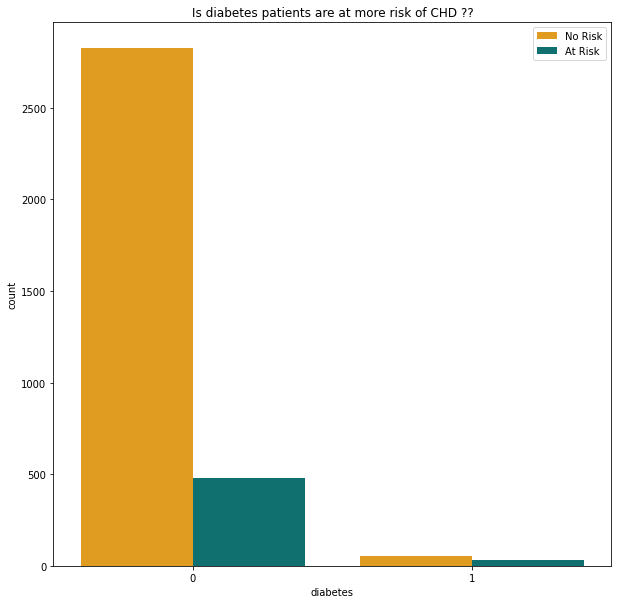

In [151]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['diabetes'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Is diabetes patients are at more risk of CHD ??")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is a smoking person are at more risk of coronary heart disease ??**

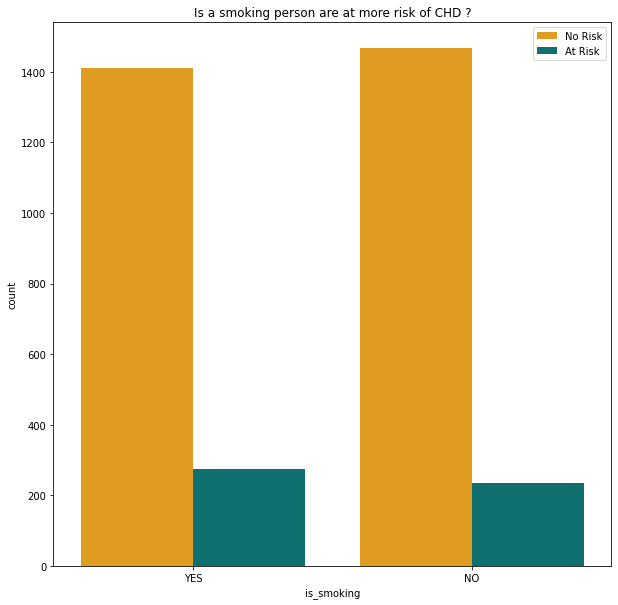

In [152]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['is_smoking'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Is a smoking person are at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is hypertensive patients are at more risk of coronary heart disease ??**

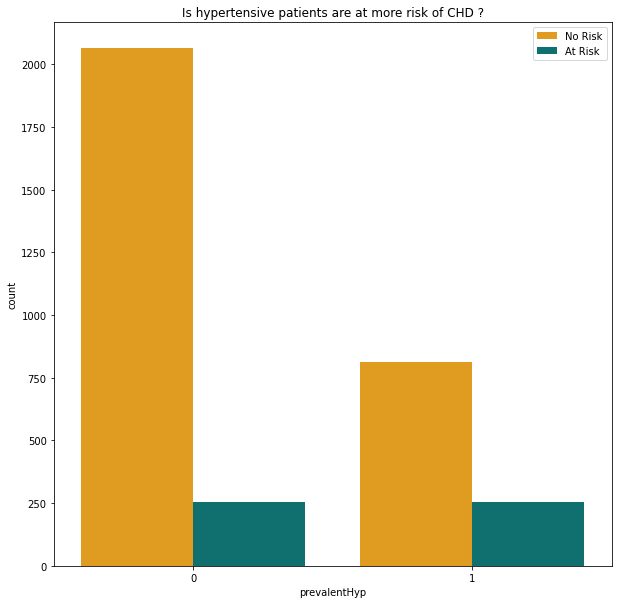

In [153]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['prevalentHyp'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Is hypertensive patients are at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Is patients with blood pressure on medication are at more risk of coronary heart disease ??**

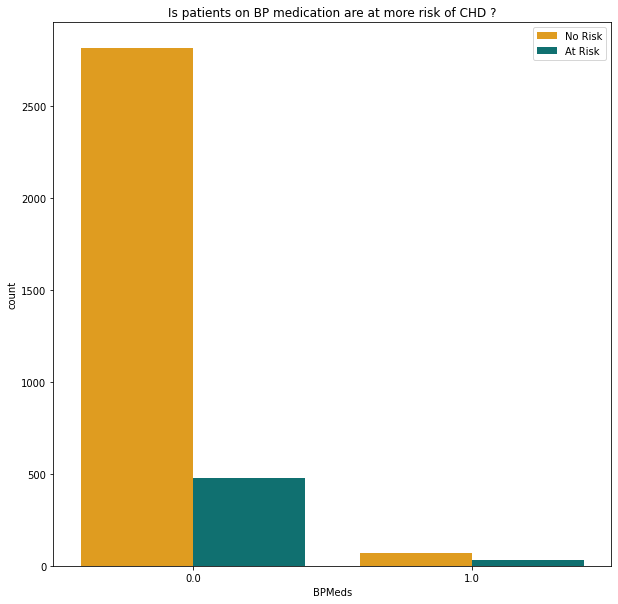

In [154]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (10,10))
sns.countplot(x = cvs_df['BPMeds'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Is patients on BP medication are at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

**Which Age group is more vulnerable to coronary heart disease ?**

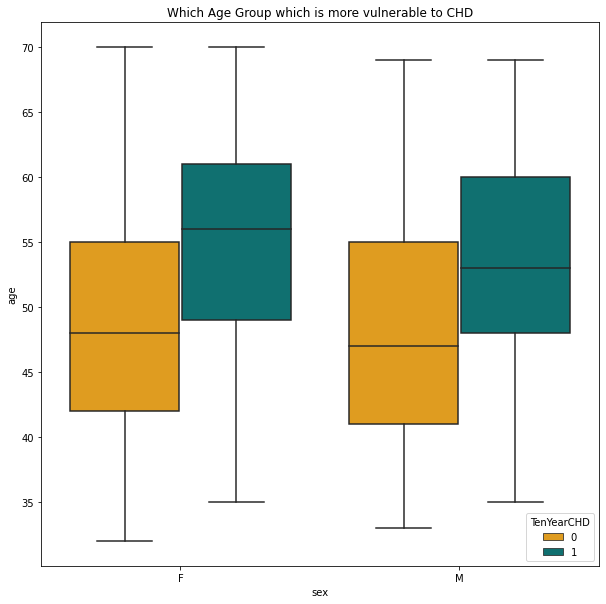

In [155]:
plt.figure(figsize = (10,10))
sns.boxplot(x = cvs_df['sex'], y = cvs_df['age'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
plt.show()

**Is cholesterol are risk of coronary heart disease ??**

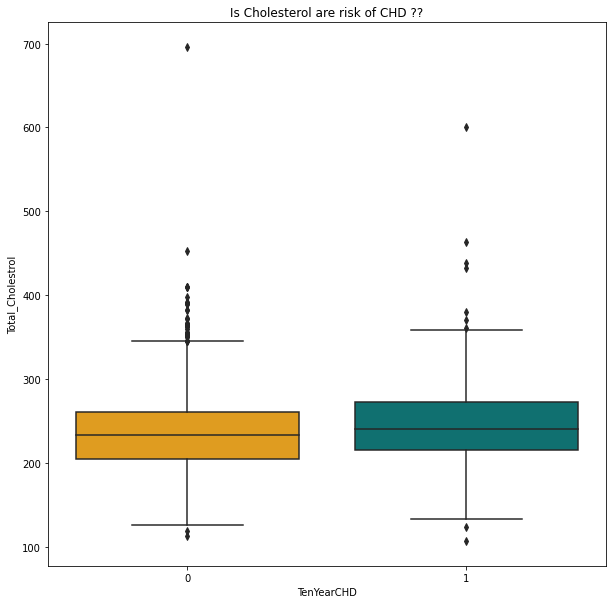

In [156]:
plt.figure(figsize = (10,10))
sns.boxplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], palette = my_palette)
plt.title("Is Cholesterol are risk of CHD ??")
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

**Let's take a deeper look into it.**

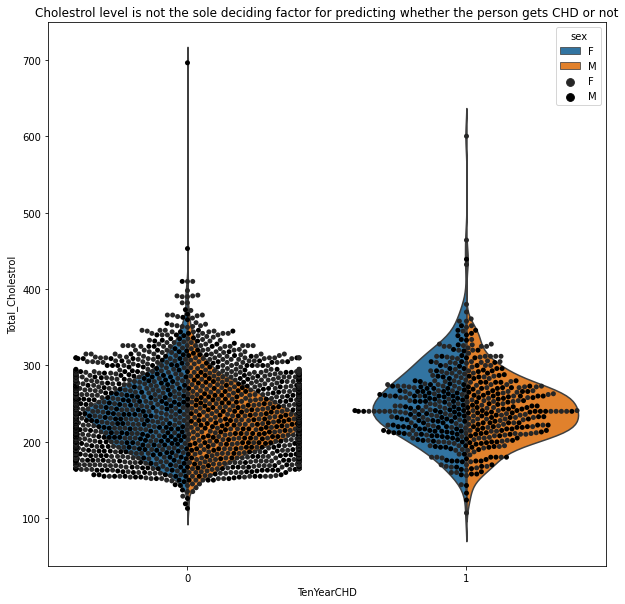

In [157]:
gender_palette = {'male' : 'teal', 'female' : 'orange'}
plt.figure(figsize = (10,10))
sns.violinplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], hue = cvs_df['sex'], split = True)
sns.swarmplot(cvs_df['TenYearCHD'], cvs_df['Total_Cholestrol'], color = 'black',hue = cvs_df['sex'])
plt.title("Cholestrol level is not the sole deciding factor for predicting whether the person gets CHD or not")
  
plt.show()

**The above plot confirms the inference made above.**

#2. Model Building


## **Naive Bayes Classifier** 

Let's first build naive bayes classifier to ast as baseline model.

In [158]:
# check datatype
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   int64  
 1   education         3390 non-null   float64
 2   sex               3390 non-null   object 
 3   is_smoking        3390 non-null   object 
 4   cigsPerDay        3390 non-null   float64
 5   BPMeds            3390 non-null   float64
 6   prevalentStroke   3390 non-null   int64  
 7   prevalentHyp      3390 non-null   int64  
 8   diabetes          3390 non-null   int64  
 9   Total_Cholestrol  3390 non-null   float64
 10  Systolic_BP       3390 non-null   float64
 11  Diastolic_BP      3390 non-null   float64
 12  BMI               3390 non-null   float64
 13  heartRate         3390 non-null   float64
 14  glucose           3390 non-null   float64
 15  TenYearCHD        3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory 

change categorical data from labels to numbers.

In [159]:
# 1 = Male, 0 = Female
cvs_df['sex'] = cvs_df['sex'].apply(lambda x: 1 if x=='M' else 0)

# 1 = Yes, 0 = No
cvs_df['is_smoking'] = cvs_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [160]:
X = cvs_df.drop(columns=['TenYearCHD']).values
Y = cvs_df['TenYearCHD'].values

In [161]:
# perform split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [162]:
# build model and train it
naive_bayes_model = GaussianNB().fit(X_train,Y_train)

In [163]:
# predict values
train_preds = naive_bayes_model.predict(X_train)
test_preds = naive_bayes_model.predict(X_test)

In [164]:
print(confusion_matrix(Y_train, train_preds))
print(confusion_matrix(Y_test, test_preds))

[[2161  144]
 [ 321   86]]
[[529  45]
 [ 82  22]]


[[2161  144]
 [ 321   86]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

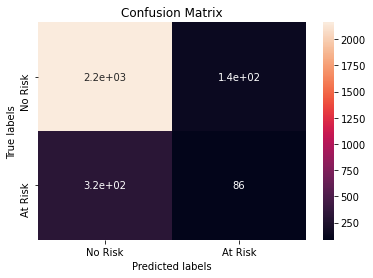

In [165]:
# Get the confusion matrix for train 
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[529  45]
 [ 82  22]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

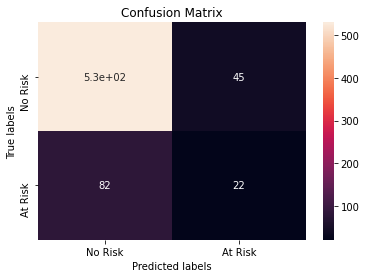

In [166]:
# Get the confusion matrix for test 
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [167]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

ROCAUC score: 0.5665706244974537
Accuracy score: 0.8126843657817109
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2305
           1       0.37      0.21      0.27       407

    accuracy                           0.83      2712
   macro avg       0.62      0.57      0.59      2712
weighted avg       0.80      0.83      0.81      2712



              precision    recall  f1-score   support

           0       0.87      0.92      0.89       574
           1       0.33      0.21      0.26       104

    accuracy                           0.81       678
   macro avg       0.60      0.57      0.58       678
weighted avg       0.78      0.81      0.80       678



Since Accuracy is not good measure we will check ROCAUC score

## **Knn**

Let's build knn to check how much score improves from naive bayes classifier.

In [168]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, Y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, Y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, Y_test) 

In [169]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.8820059  0.88974926 0.86836283 0.87131268 0.86246313
 0.86688791 0.85951327 0.8620944  0.85803835]
Test Accuracy:  [0.77433628 0.83185841 0.81268437 0.83480826 0.82300885 0.83333333
 0.83038348 0.83923304 0.83923304 0.84365782]


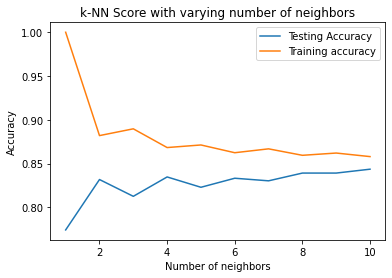

In [170]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

In [171]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [172]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [173]:
knn_cv.best_score_

0.8513274336283185

In [174]:
knn_cv.best_params_

{'n_neighbors': 10}

Text(0.5, 1.0, 'Roc Auc Curve for kNN - 10')

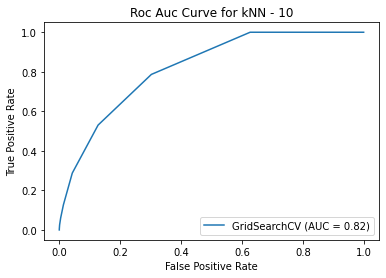

In [175]:
plot_roc_curve(knn_cv,X,Y)
plt.title("Roc Auc Curve for kNN - " + str(knn_cv.best_params_['n_neighbors']))

# **Logistic Regression**

In [176]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [177]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 6.34834848e-02, -2.07318927e-02,  4.85745043e-01,
        -3.65905433e-03,  2.47509941e-02, -1.49312546e-01,
         1.18511554e+00,  4.13414423e-02,  8.91950605e-02,
         3.44047541e-03,  1.91935107e-02, -1.07431904e-03,
        -9.43061723e-03, -5.37937220e-03,  9.53654533e-03]])

In [178]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [179]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,Y_train)
test_accuracy = accuracy_score(test_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8609882005899705
The accuracy on test data is  0.8466076696165191


[[2290   15]
 [ 362   45]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

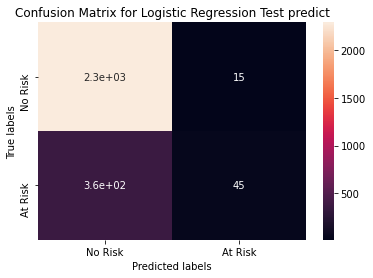

In [180]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[566   8]
 [ 96   8]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

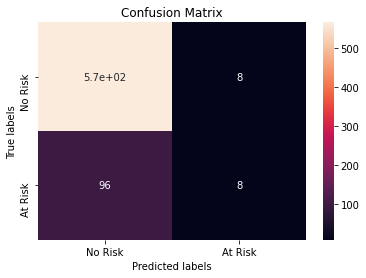

In [181]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [182]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

ROCAUC score: 0.5314928973465559
Accuracy score: 0.8466076696165191
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2305
           1       0.75      0.11      0.19       407

    accuracy                           0.86      2712
   macro avg       0.81      0.55      0.56      2712
weighted avg       0.85      0.86      0.81      2712



              precision    recall  f1-score   support

           0       0.85      0.99      0.92       574
           1       0.50      0.08      0.13       104

    accuracy                           0.85       678
   macro avg       0.68      0.53      0.52       678
weighted avg       0.80      0.85      0.80       678



Even Logistic Regression is not performing better, This is due to imbalance dataset.
We have large number of record that are not at risk and less number of records that are at risk of future coronary heart disease.

Let's Resample the dataset to over come this imbalance.
We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [183]:
smote = SMOTE()
# fit predictor and target variable
X_balanced, Y_balanced = smote.fit_resample(cvs_df.iloc[:,0:-1], cvs_df['TenYearCHD'])

In [184]:
print('Original dataset shape', cvs_df.shape)
print('Resampled dataset shape', X_balanced.shape)

Original dataset shape (3390, 16)
Resampled dataset shape (5758, 15)


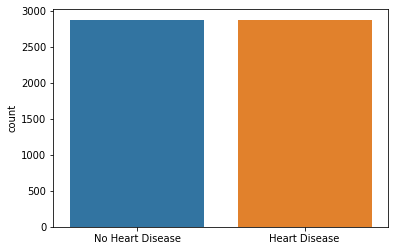

In [185]:
# visualizing the target variable after resample
g = sns.countplot(Y_balanced)
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

Now we have balanced dataset so we can apply logistic regression on balanced dataset

In [186]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=0)

In [187]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [188]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 7.10834603e-02, -1.68321081e-02,  4.77678256e-01,
         3.75281354e-01,  1.54820339e-02,  4.89523805e-01,
         1.12740250e+00,  1.67458885e-01,  1.13916328e-02,
         3.60475926e-03,  1.36329827e-02, -8.92317744e-04,
        -1.03940688e-02, -2.69380740e-03,  8.26813505e-03]])

In [189]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [190]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,Y_train)
test_accuracy = accuracy_score(test_preds,Y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6795484151107252
The accuracy on test data is  0.6605902777777778


[[363 190]
 [201 398]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

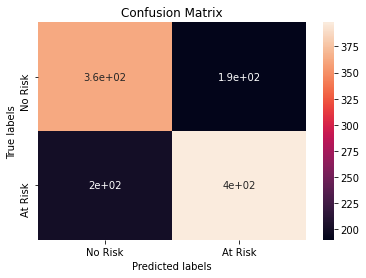

In [191]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [192]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(Y_test, test_preds))
print('Accuracy score:', accuracy_score(Y_test, test_preds))

# Print the classification report for train and test
print(classification_report(Y_train, train_preds))
print("\n")
print(classification_report(Y_test, test_preds))

ROCAUC score: 0.6604301321974237
Accuracy score: 0.6605902777777778
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      2326
           1       0.67      0.68      0.68      2280

    accuracy                           0.68      4606
   macro avg       0.68      0.68      0.68      4606
weighted avg       0.68      0.68      0.68      4606



              precision    recall  f1-score   support

           0       0.64      0.66      0.65       553
           1       0.68      0.66      0.67       599

    accuracy                           0.66      1152
   macro avg       0.66      0.66      0.66      1152
weighted avg       0.66      0.66      0.66      1152



Our accuracy score is decreased but ROCAUC score improved.
Let's try tree based algorithm to solve this problem.

### Building Desicion Tree Model
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [193]:
from sklearn.tree import DecisionTreeClassifier


In [194]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="gini",max_leaf_nodes= 10,random_state=0)
decision_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting on test cell and train cell

In [195]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [196]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(Y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 73.17708333333334
the training accuracy is 74.2509769865393


In [197]:
#visualisation of decision tree model
from sklearn import tree


[Text(365.3571428571429, 830.5, 'X[0] <= 46.008\ngini = 0.5\nsamples = 4606\nvalue = [2326, 2280]'),
 Text(132.85714285714286, 679.5, 'X[4] <= 0.066\ngini = 0.383\nsamples = 1463\nvalue = [1085, 378]'),
 Text(66.42857142857143, 528.5, 'gini = 0.185\nsamples = 496\nvalue = [445, 51]'),
 Text(199.28571428571428, 528.5, 'X[3] <= 0.985\ngini = 0.448\nsamples = 967\nvalue = [640, 327]'),
 Text(132.85714285714286, 377.5, 'gini = 0.0\nsamples = 58\nvalue = [0, 58]'),
 Text(265.7142857142857, 377.5, 'X[2] <= 0.001\ngini = 0.417\nsamples = 909\nvalue = [640, 269]'),
 Text(199.28571428571428, 226.5, 'gini = 0.233\nsamples = 371\nvalue = [321, 50]'),
 Text(332.14285714285717, 226.5, 'X[2] <= 0.98\ngini = 0.483\nsamples = 538\nvalue = [319, 219]'),
 Text(265.7142857142857, 75.5, 'gini = 0.0\nsamples = 65\nvalue = [0, 65]'),
 Text(398.57142857142856, 75.5, 'gini = 0.439\nsamples = 473\nvalue = [319, 154]'),
 Text(597.8571428571429, 679.5, 'X[2] <= 0.001\ngini = 0.478\nsamples = 3143\nvalue = [1241,

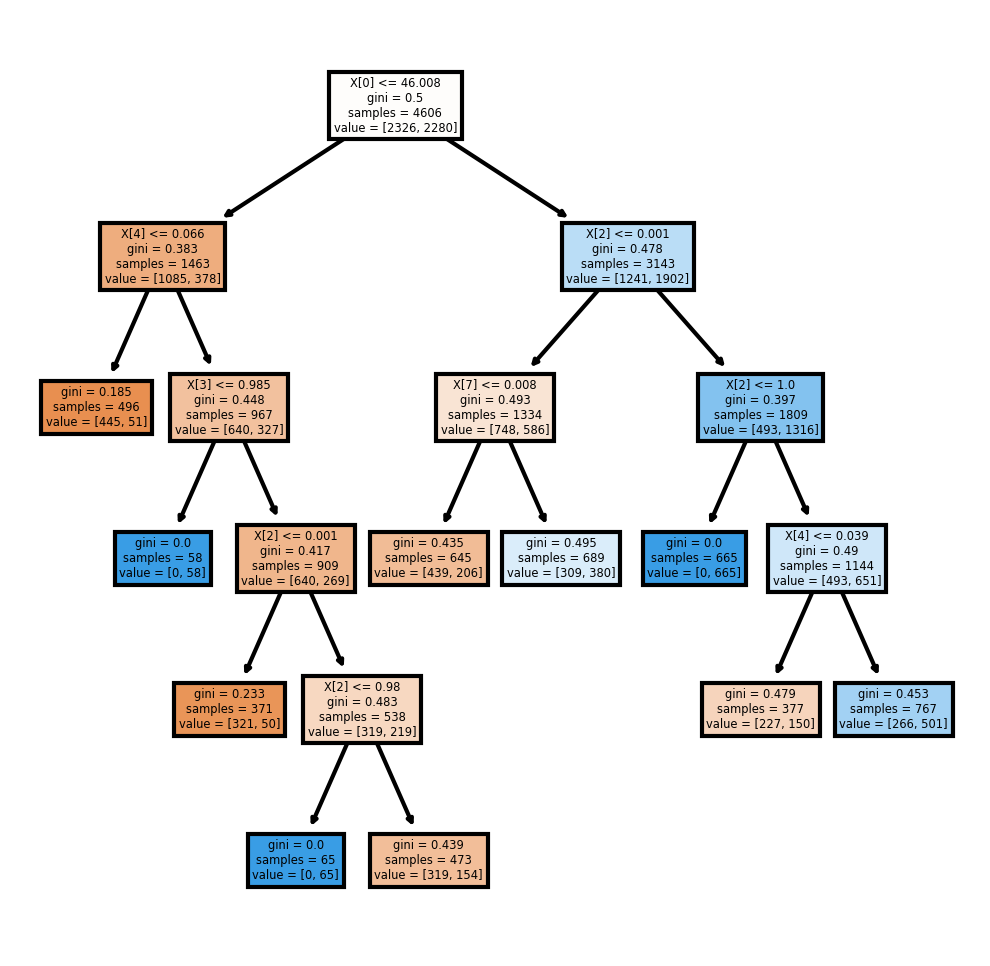

In [198]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[1751  575]
 [ 611 1669]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

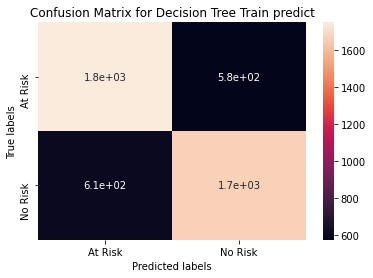

In [199]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[411 142]
 [167 432]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

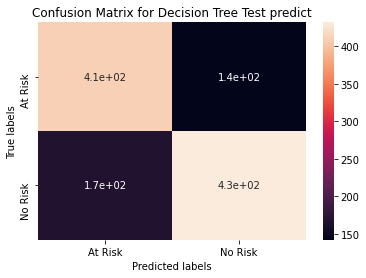

In [200]:
#the confusion matrix for test data
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [201]:
#classification report for train
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2326
           1       0.74      0.73      0.74      2280

    accuracy                           0.74      4606
   macro avg       0.74      0.74      0.74      4606
weighted avg       0.74      0.74      0.74      4606



In [202]:
#classification report for test
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73       553
           1       0.75      0.72      0.74       599

    accuracy                           0.73      1152
   macro avg       0.73      0.73      0.73      1152
weighted avg       0.73      0.73      0.73      1152



## Building Ensembles of Decision Tree


In [203]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [204]:
classifier = RandomForestClassifier(n_estimators=30,max_depth=20,random_state=30,min_samples_split=3,criterion='entropy')

In [205]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [206]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

Finding the accuracy and Roc_Auc score

In [207]:
accuracy_score(Y_train,train_preds)

0.998697351280938

In [208]:
accuracy_score(Y_test,test_preds)

0.9001736111111112

In [209]:
roc_auc_score(Y_test,test_preds)

0.9015764671076266

In [210]:
roc_auc_score(Y_train,train_preds)

0.9986842105263158

[[2326    0]
 [   6 2274]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

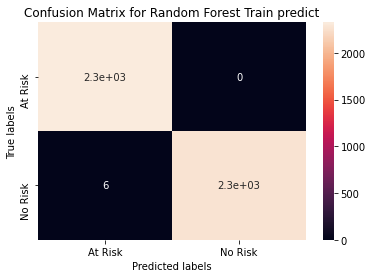

In [211]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[518  35]
 [ 80 519]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

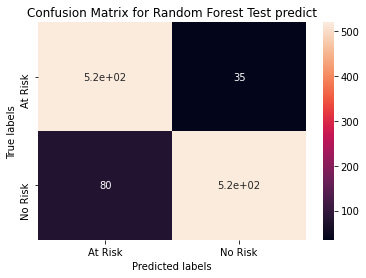

In [212]:
#the confusion matrix for test data
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [213]:
#classification report for train
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [214]:
#classification report for test
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       553
           1       0.94      0.87      0.90       599

    accuracy                           0.90      1152
   macro avg       0.90      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152



In [215]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [216]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [217]:
gradientBC.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [218]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

The accuracy and Roc_Auc Score

In [219]:
accuracy_score(Y_train,train_preds)

0.896873643074251

In [220]:
accuracy_score(Y_test,test_preds)

0.8671875

In [221]:
roc_auc_score(Y_test,test_preds)


0.8706207150555325

In [222]:
roc_auc_score(Y_train,train_preds)

0.8960978865909398

[[2265   61]
 [ 414 1866]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

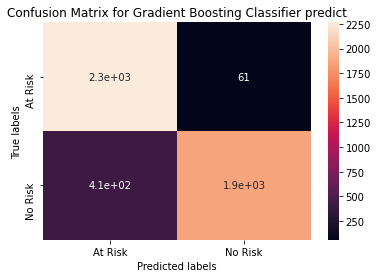

In [223]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[529  24]
 [129 470]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

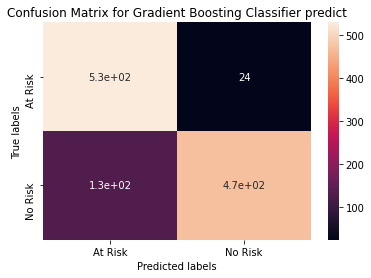

In [224]:
#the confusion matrix for testing
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifier')

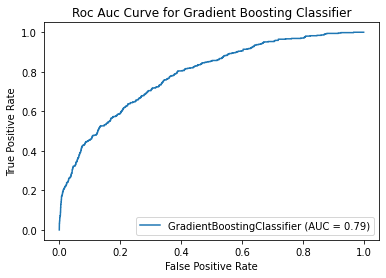

In [225]:
plot_roc_curve(gradientBC,X,Y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

classification repost of train and test

In [226]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       553
           1       0.95      0.78      0.86       599

    accuracy                           0.87      1152
   macro avg       0.88      0.87      0.87      1152
weighted avg       0.88      0.87      0.87      1152



              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2326
           1       0.97      0.82      0.89      2280

    accuracy                           0.90      4606
   macro avg       0.91      0.90      0.90      4606
weighted avg       0.91      0.90      0.90      4606



In [227]:
import xgboost as xgb

In [228]:
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [229]:
xg_cla.fit(X_test,Y_test)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [230]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [231]:
accuracy_score(Y_train,train_preds)

0.8352149370386452

In [232]:
accuracy_score(Y_test,test_preds)

0.9696180555555556

In [233]:
roc_auc_score(Y_test,test_preds)

0.9693959492463329

In [234]:
roc_auc_score(Y_train,train_preds)

0.8351312772472884

[[1962  364]
 [ 395 1885]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

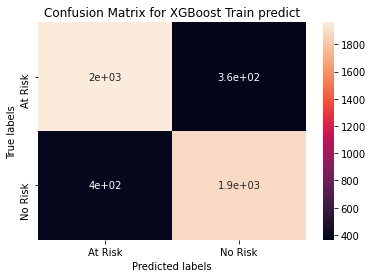

In [235]:
#the confusion matrix for training
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[533  20]
 [ 15 584]]


[Text(0, 0.5, 'At Risk'), Text(0, 1.5, 'No Risk')]

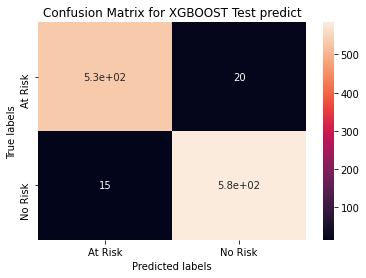

In [236]:
#the confusion matrix for testing
labels = ['At Risk', 'No Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classifucation Repost For train and test

In [237]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       553
           1       0.97      0.97      0.97       599

    accuracy                           0.97      1152
   macro avg       0.97      0.97      0.97      1152
weighted avg       0.97      0.97      0.97      1152



              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2326
           1       0.84      0.83      0.83      2280

    accuracy                           0.84      4606
   macro avg       0.84      0.84      0.84      4606
weighted avg       0.84      0.84      0.84      4606



Visualising the tree

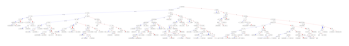

In [238]:
xgb.plot_tree(xg_cla,num_trees=0)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

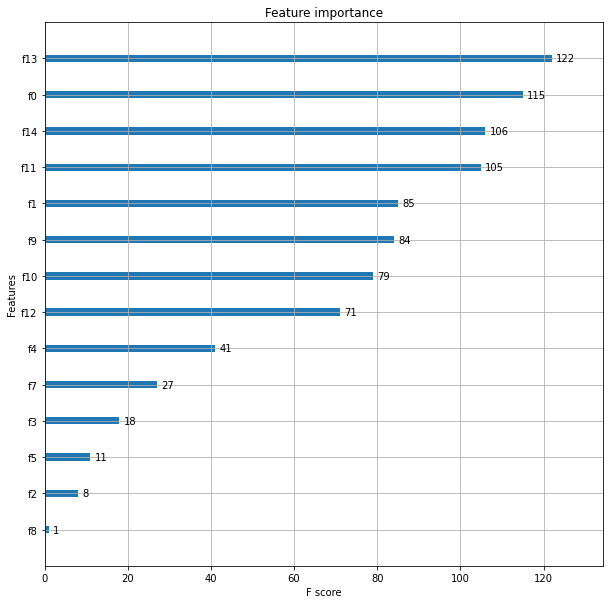

In [239]:
xgb.plot_importance(xg_cla)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()